<a href="https://colab.research.google.com/github/manassanant132/Fundamental-of-Deep-Learning/blob/main/Unit15_Transfer_Learning_with_Keras_for_Computer_Vision_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer Learning เป็นการนำ Weight ของ Model ที่ถูก Train ด้วย Dataset ในงานหนึ่ง (Pre-trained Model) กลับมาใช้ใหม่กับอีกงาน แทนที่จะต้อง Train ด้วยตัวเองตั้งแต่ต้น ซึ่งอาจจะใช้เวลาเป็นวันๆ หรือเป็นอาทิตย์ โดยนอกจากเป็นทางลัดที่ช่วยประหยัดเวลาแล้ว การทำ Transfer Learning ยังช่วยเพิ่มประสิทธิภาพการเรียนรู้ของ Model ในงานใหม่ด้วย

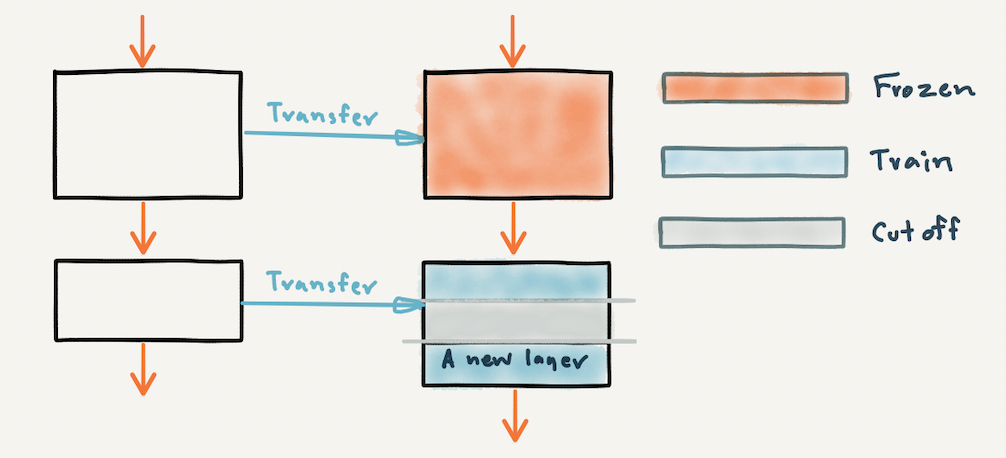

ในบทความนี้ เราจะนำ Weight ของ Top 20 Pre-trained CNN Models ได้แก่ [Oxford VGG](https://arxiv.org/abs/1409.1556), [Microsoft ResNet](https://arxiv.org/abs/1512.03385) และ[ Google NASNetLarge](https://arxiv.org/abs/1707.07012) ที่ถูก Train ด้วย [ImageNet Dataset](https://image-net.org/) (Standard Computer Vision Benchmark Dataset) ไปประยุกต์ใช้กับงานด้านต่างๆ ด้วย Keras Library บน Google Colab ครับ


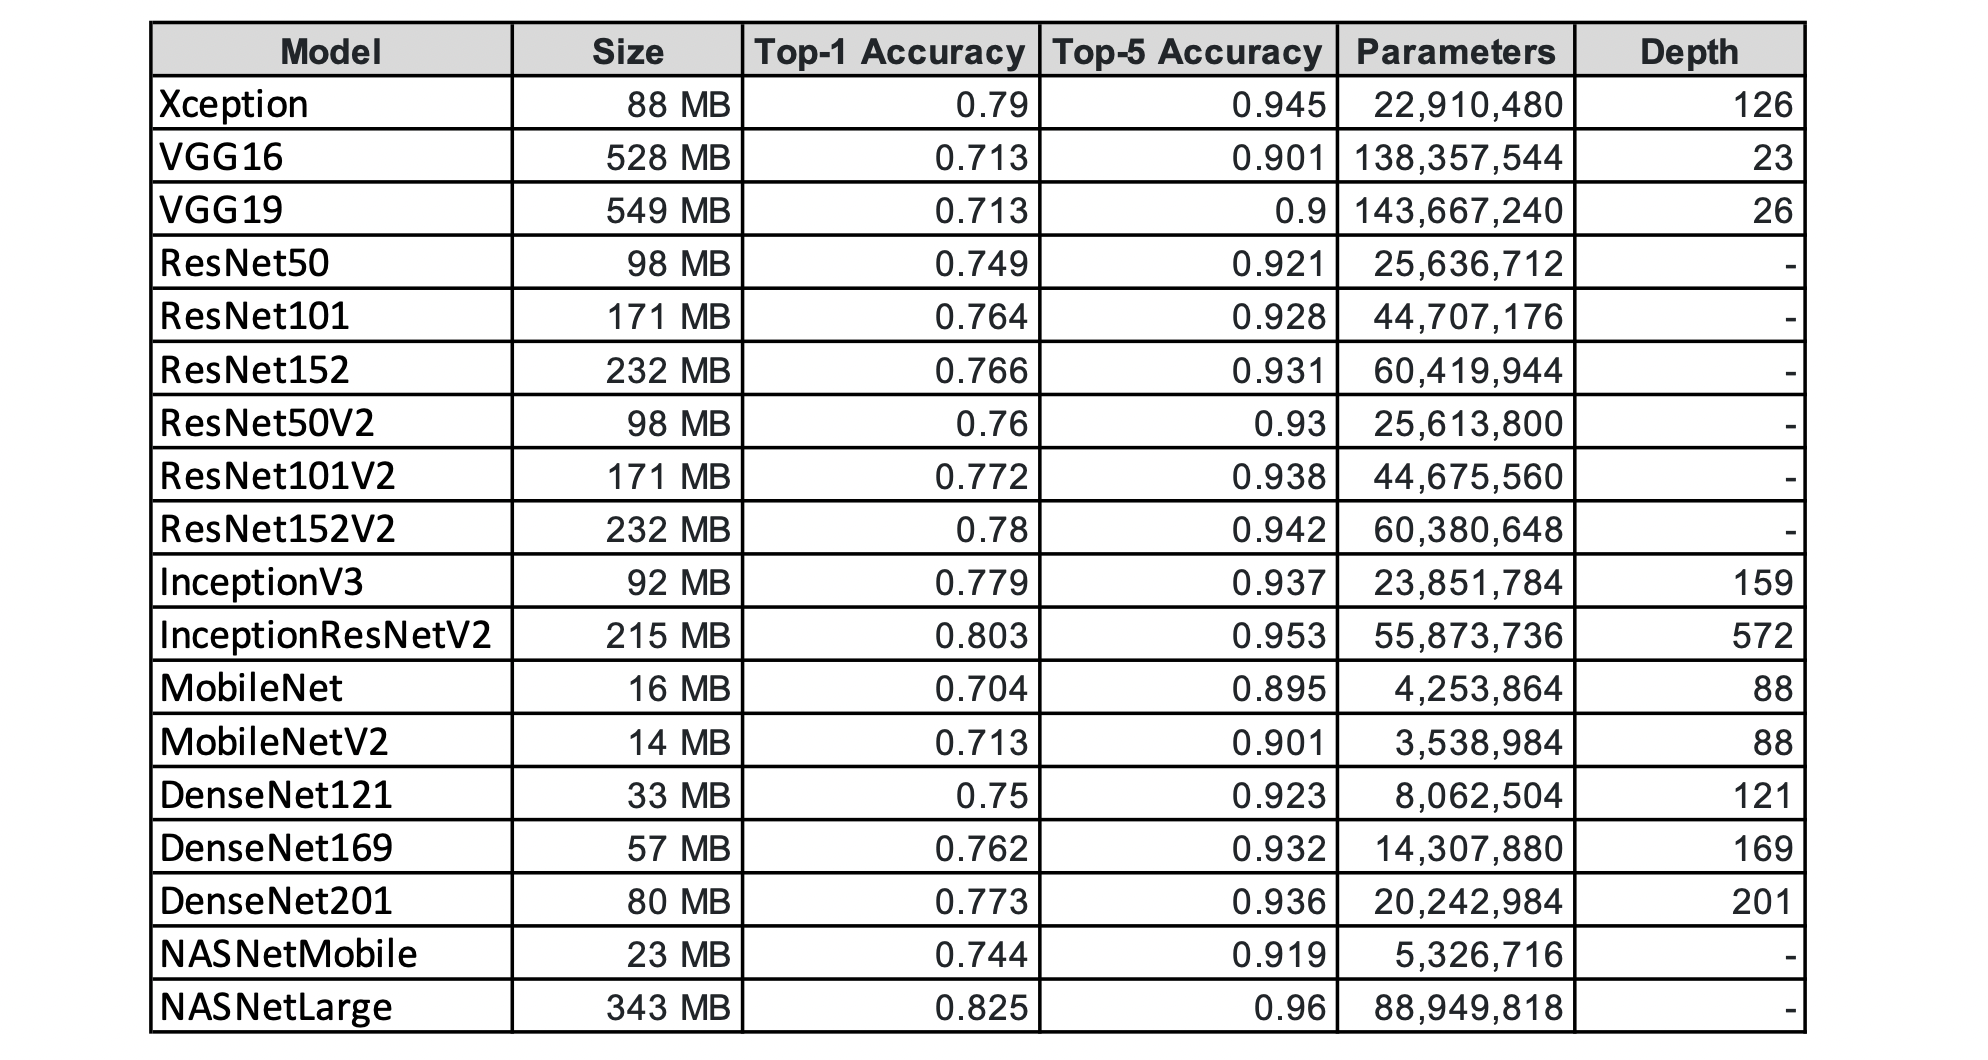

#CNN Architecture

ปกติโครงสร้างของ CNN Model จะประกอบด้วย Convolutional Base Layer และ Classifier Layer

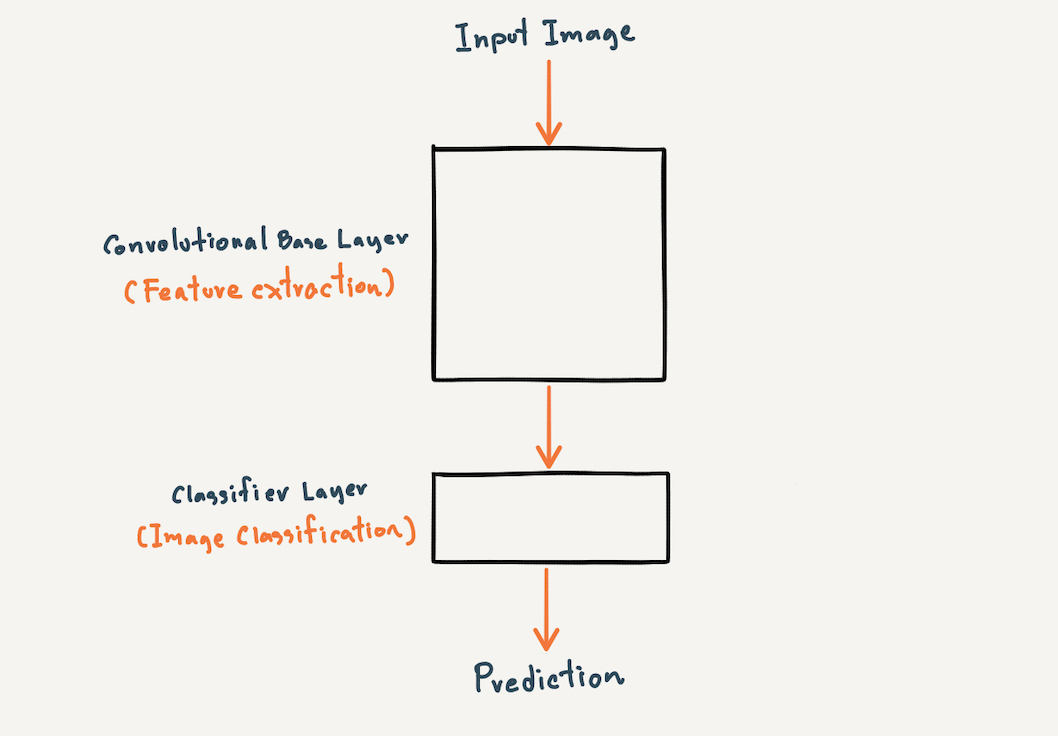

Convolutional Base Layer จะเป็นส่วนที่มีหน้าที่ในการสกัด Feature ของภาพ (Feature Extraction) และ Classifier Layer มีหน้าที่ในการแยกประเภทภาพ (Image Classification) โดยเราสามารถนิยาม Model ที่มีโครงสร้างทั้ง 2 ส่วน ด้วย Keras Library ได้ดังต่อไปนี้


In [ ]:
import tensorflow as tf

In [ ]:
#Feature Extraction
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Image Classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

ซึ่งทั้ง VGG, ResNet และ NASNetLarge ต่างก็มีโครงสร้าง 2 ส่วน คือ Convolutional Base Layer และ Classifier Layer ที่สามารถปรับแต่งให้เหมาะสมกับการใช้งานในกรณีต่างๆ

#Transfer Learning Strategies

เพื่อให้เข้าใจว่าเราสามารถนำ Pre-trained Model ไปใช้อย่างไรได้บ้าง ผมจะขอแสดงภาพประกอบด้านล่างซึ่งมีรูปแบบการนำไปใช้ คือ Classify ภาพโดยตรงโดยไม่ปรับแต่งอะไร (S1) ตัด Top Layer (Classification Layer) เพื่อเอา Feature ไปใช้งาน (S2) เพิ่ม Layer ใหม่หลังจากตัดส่วนปลายแล้ว แช่แข็งบาง Layer (Frozen) และ Train ใหม่บาง Layer (S3, S4 และ S5) หรือแม้แต่ Train ใหม่ทุก Layer (S6) เป็นต้น

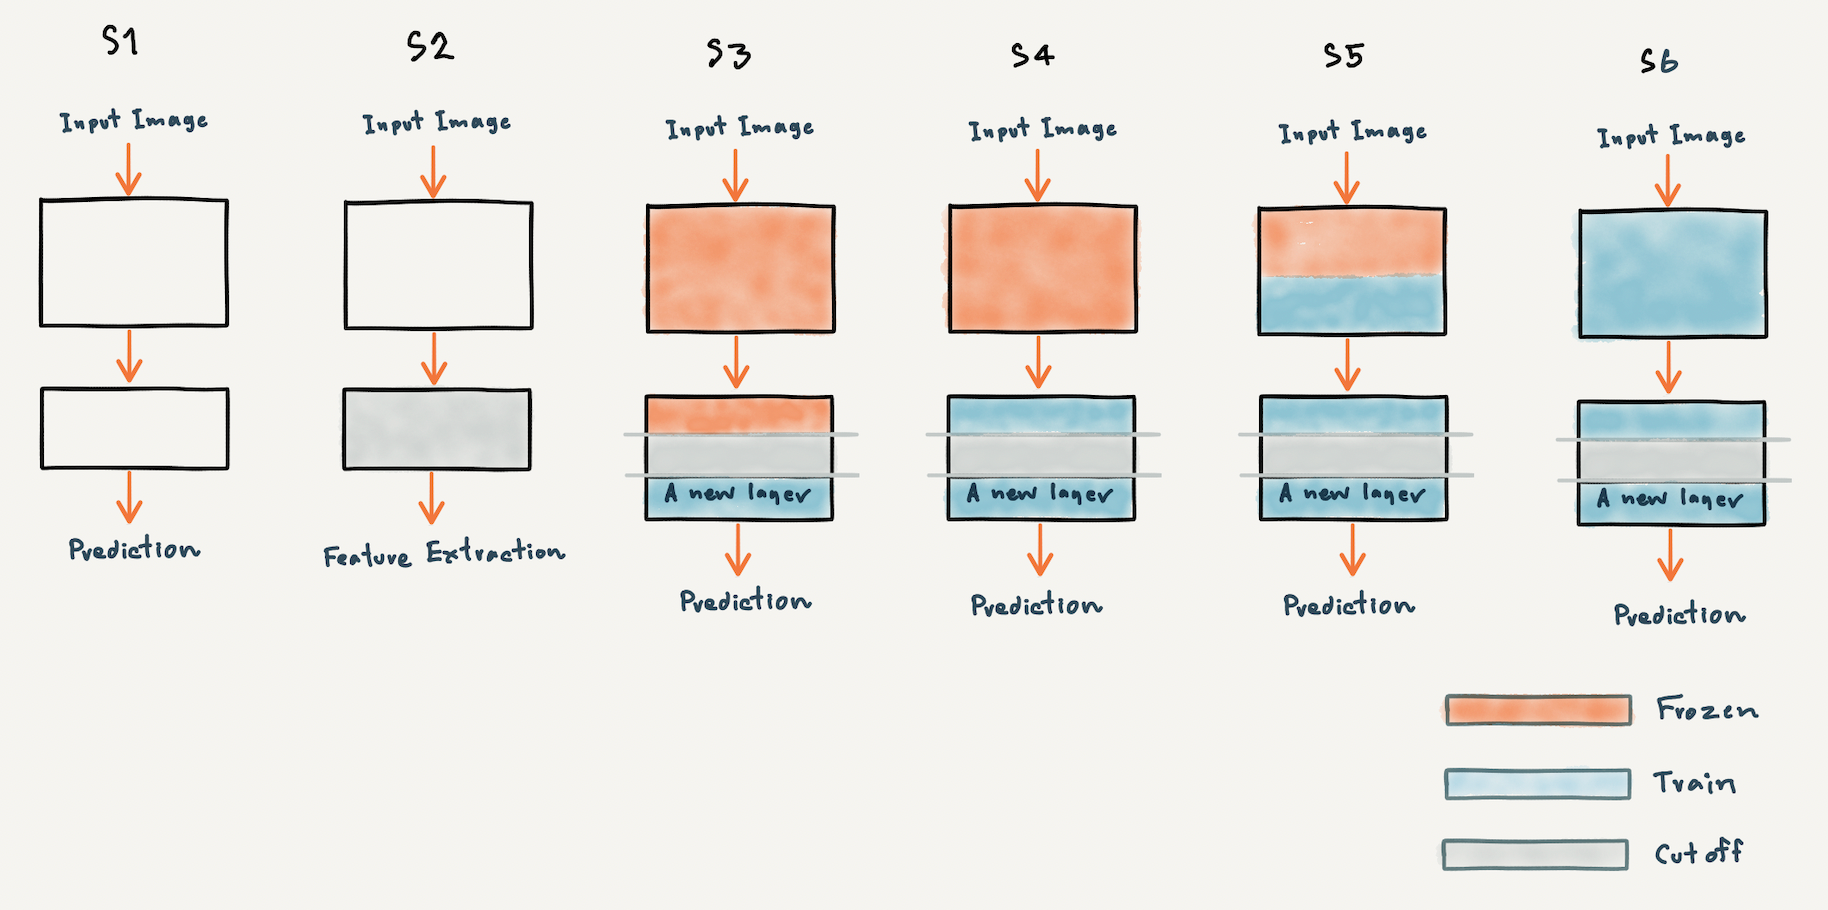

#Computer Vision Applications

ในงานด้าน Computer Vision เราสามารถประยุกต์ใช้งาน Pre-trained Model ได้หลากหลายวิธี บทความนี้จะยกตัวอย่างการนำไปใช้งานแค่ 3 วิธี ได้แก่

- Classifier นำ Pre-trained Model ไป Classify ภาพใหม่โดยตรง (Strategy S1)

- Image Search ค้นหาภาพด้วย Feature ที่ได้จาก Pre-trained Model (Strategy S2)

- Fine-tuning (Classifier) Classify ภาพในงานใหม่ โดยตัดส่วนปลายของ Pre-trained Model เพิ่ม Layer ใหม่ แล้วแช่แข็งบาง Layer หรือ Train ใหม่ทุก Layer (Strategy S3 S4 S5 และ S6)

###Classifier

ความท้าทายหนึ่งของ ImageNet ที่นอกจากจะมีการรวบรวมภาพไว้มากกว่า 1 ล้านภาพ ซึ่งทำให้มันกลายเป็น Standard Benchmark Dataset แล้วนั้น ยังมีความท้าทายสำหรับการทดสอบประสิทธิภาพ Pre-trained Model คือ การที่มันมีจำนวน Class มากถึง 1,000 Class

ในตัวอย่างนี้เราจะนำ Top 20 Pre-trained CNN Models อย่างเช่น VGG, ResNet และ NASNetLarge ที่สามารถ Classify ภาพได้ทั้งหมด 1,000 Class ไป Classify ภาพใหม่ๆ โดยตรง ดังนี้

ไปที่ Google Colab แล้วคลิ๊ก NEW NOTEBOOK

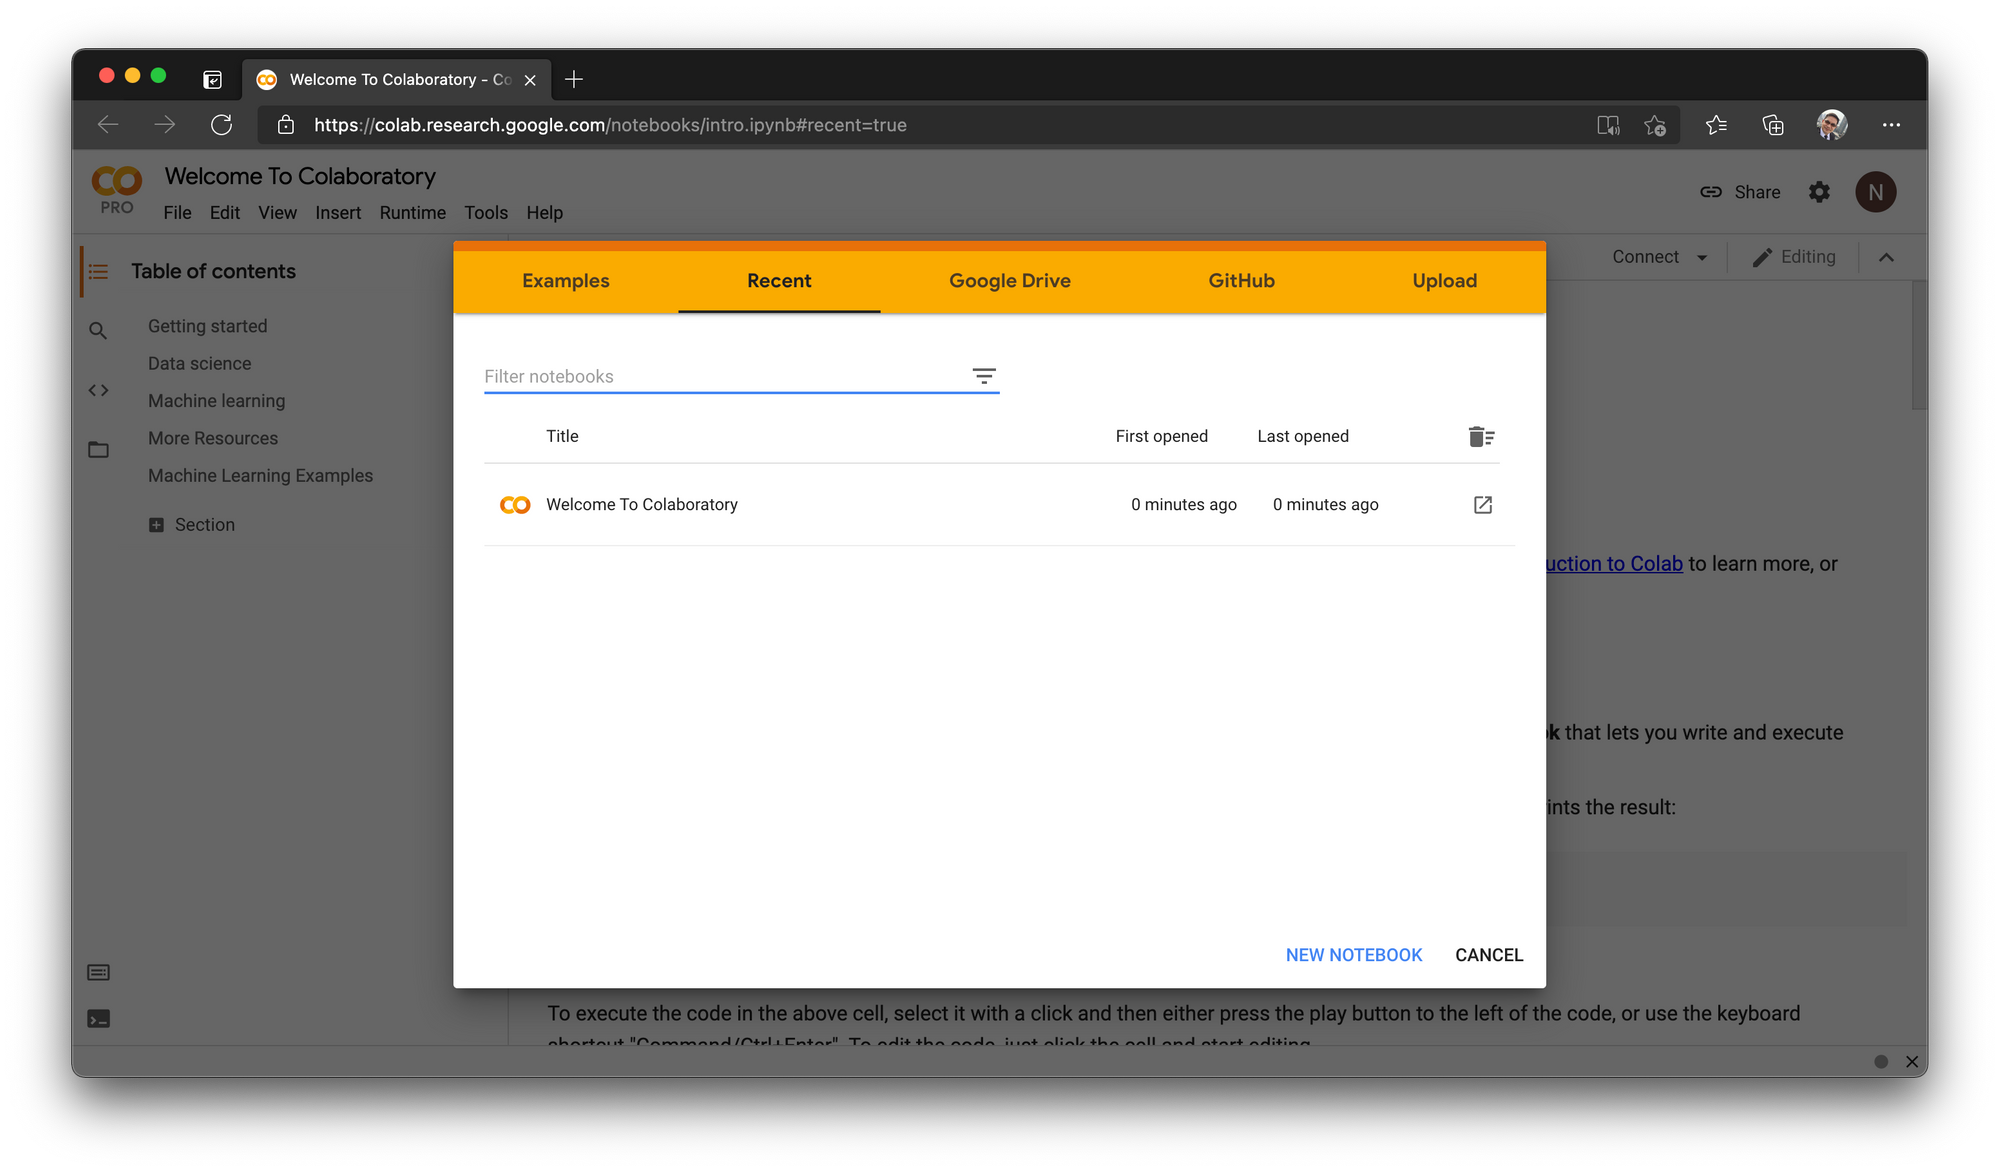

คลิ๊กที่ Untitledx.ipynb ตั้งชื่อไฟล์เป็น tf101.ipynb แล้ว เลือกเมนู Runtime -> Change runtime type

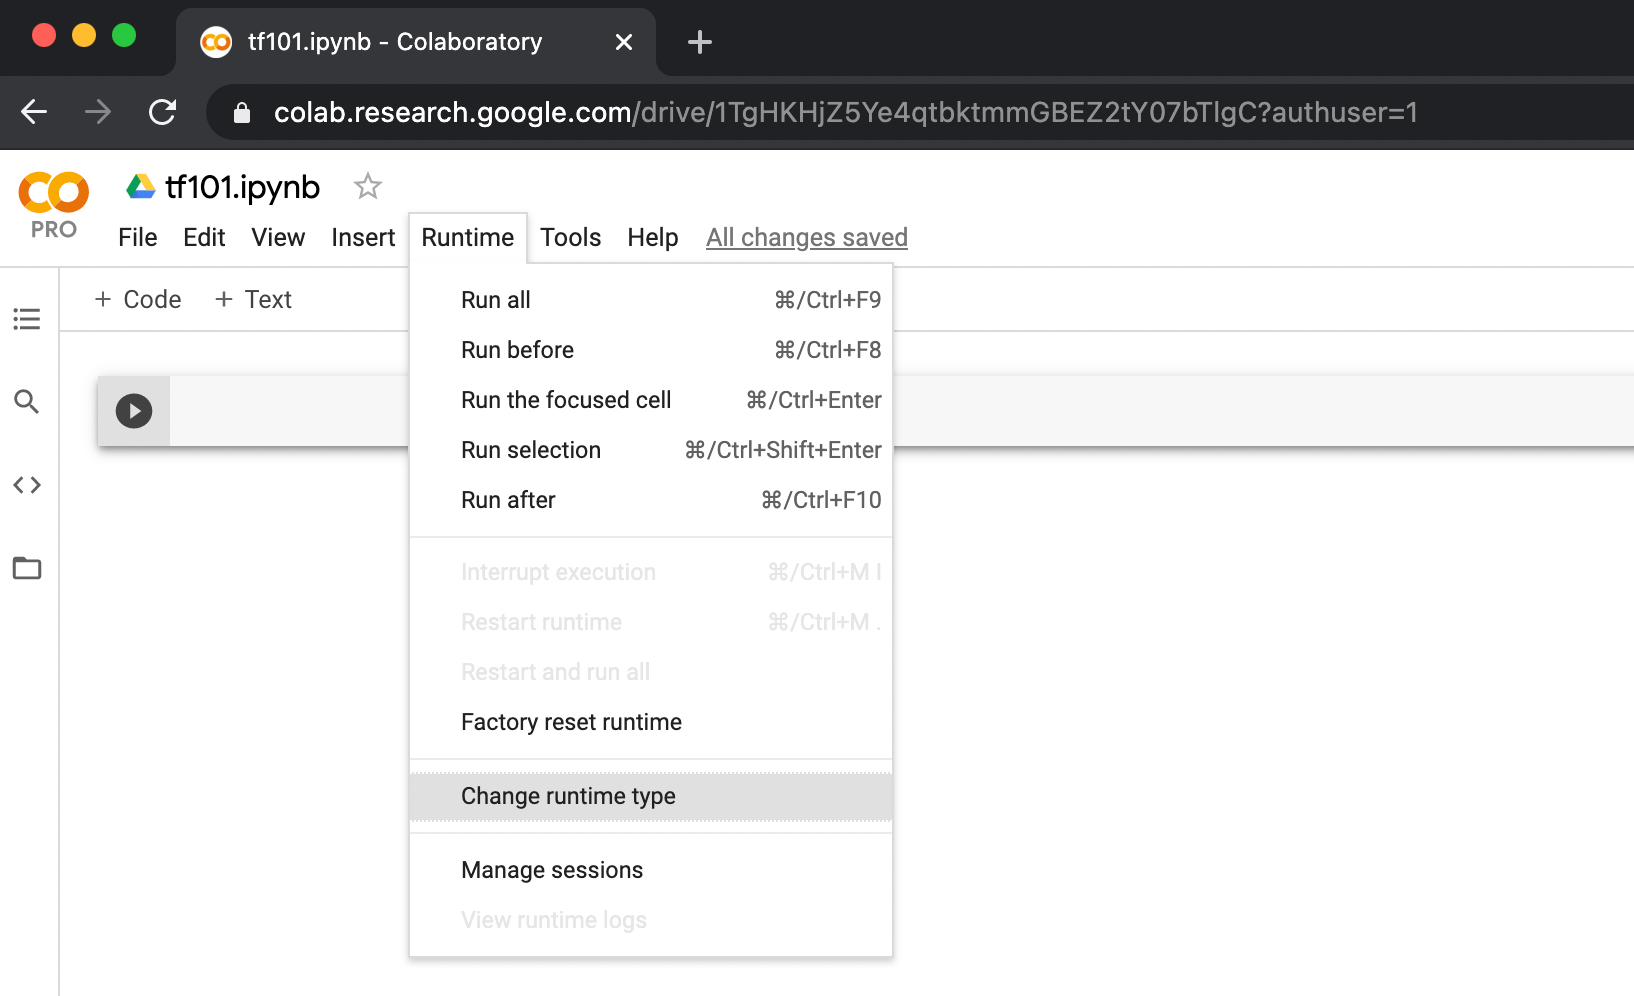

เลือกชนิดของ Hardware accelerator เป็น GPU และ Runtime shape เป็น High-RAM แล้วคลิ๊ก SAVE

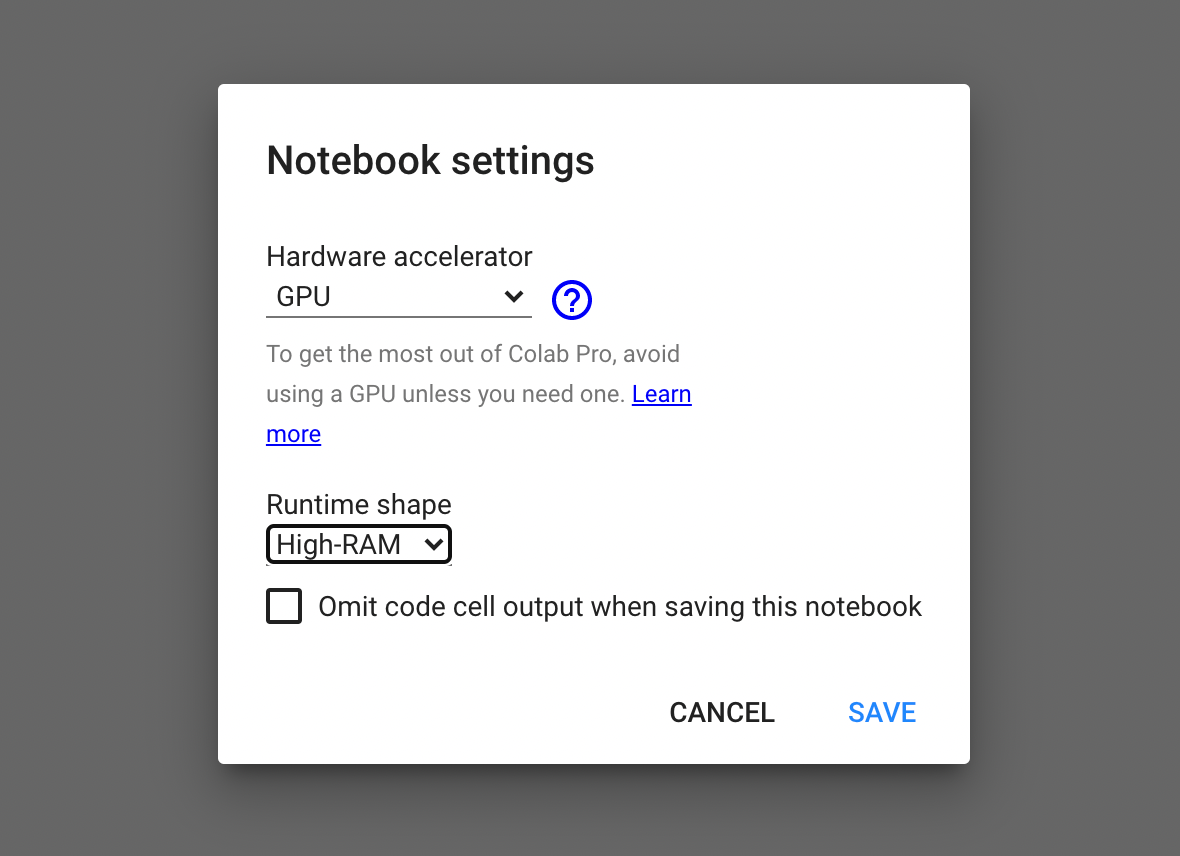

ตรวจสอบการใช้งาน GPU ด้วยคำสั่งต่อไปนี้

Import Library ที่ต้องใช้งาน

In [ ]:
import numpy as np
import tensorflow as tf

load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

Adam = tf.keras.optimizers.Adam

import copy
import glob
import pickle as pic
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
from plotly import tools

ท่านสามารถ Download ภาพน้องตังค์ฟูจาก http://gitlab.cpsudevops.com/nuttachot/cat.git โดยการคลิ๊กที่ Terminal แล้วพิมพ์คำสั่ง git clone

In [ ]:
# !git clone http://gitlab.cpsudevops.com/nuttachot/cat.git

In [ ]:
!cp /content/drive/MyDrive/git_data/cat_data.zip /content/cat_data_zip

In [ ]:
!ls -lh *

-rw------- 1 root root 2.0G Sep  3 09:05 cat_data_zip

drive:
total 4.0K
drwx------ 11 root root 4.0K Sep  3 09:03 MyDrive

sample_data:
total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root 295K Aug 31 13:25 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Aug 31 13:25 california_housing_train.csv
-rw-r--r-- 1 root root  18M Aug 31 13:25 mnist_test.csv
-rw-r--r-- 1 root root  35M Aug 31 13:25 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md


In [ ]:
!unzip -qq /content/cat_data_zip

In [ ]:
example_path ="/content/images/Egyptian Mau/15067870_1121.jpg"

Load ภาพน้องตังค์ฟู โดยกำหนดขนาดเป็น 224x224 สำหรับ VGG และ ResNet Model

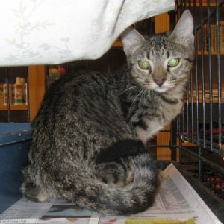

In [ ]:
#vgg16_input_image = load_img('cat/cat.jpg', target_size=(224, 224))
vgg16_input_image = load_img(example_path, target_size=(224, 224))

vgg16_input_image

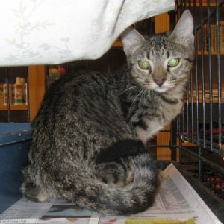

In [ ]:
resnet_input_image = copy.deepcopy(vgg16_input_image)
resnet_input_image

Load ภาพน้องตังค์ฟู โดยกำหนดขนาดเป็น 331x331 สำหรับ NASNetLarge Model

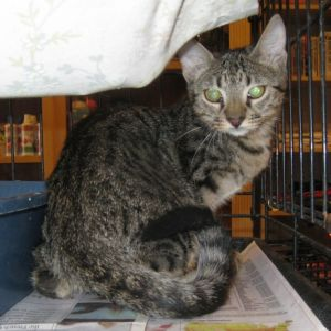

In [ ]:
# nasnetlarge_input_image = load_img('cat/cat.jpg', target_size=(331, 331))
nasnetlarge_input_image = load_img(example_path, target_size=(331, 331))
nasnetlarge_input_image

แปลงเป็น Array

In [ ]:
vgg16_input_image = img_to_array(vgg16_input_image)
resnet_input_image = img_to_array(resnet_input_image)
nasnetlarge_input_image = img_to_array(nasnetlarge_input_image)

vgg16_input_image.shape, resnet_input_image.shape, nasnetlarge_input_image.shape

((224, 224, 3), (224, 224, 3), (331, 331, 3))

ขยายมิติของ Array เพื่อเตรียมนำเข้า Model

In [ ]:
vgg16_input_image = np.expand_dims(vgg16_input_image, axis=0)
resnet_input_image = np.expand_dims(resnet_input_image, axis=0)
nasnetlarge_input_image = np.expand_dims(nasnetlarge_input_image, axis=0)

vgg16_input_image.shape, resnet_input_image.shape, nasnetlarge_input_image.shape

((1, 224, 224, 3), (1, 224, 224, 3), (1, 331, 331, 3))

แสดงค่าต่ำสุด-สูงสดใน Array

In [ ]:
vgg16_input_image.min(), vgg16_input_image.max(), resnet_input_image.min(), resnet_input_image.max(), nasnetlarge_input_image.min(), nasnetlarge_input_image.max()

(0.0, 255.0, 0.0, 255.0, 0.0, 255.0)

เตรียมข้อมูลให้พร้อมสำหรับแต่ละ Model

In [ ]:
vgg16_input_image =  tf.keras.applications.vgg16.preprocess_input(vgg16_input_image)

vgg16_input_image.min(), vgg16_input_image.max()

(-122.68, 151.061)

In [ ]:
resnet_input_image =  tf.keras.applications.resnet_v2.preprocess_input(resnet_input_image)

resnet_input_image.min(), resnet_input_image.max()

(-1.0, 1.0)

In [ ]:
nasnetlarge_input_image =  tf.keras.applications.nasnet.preprocess_input(nasnetlarge_input_image)

nasnetlarge_input_image.min(), nasnetlarge_input_image.max()

(-1.0, 1.0)

Load Pre-trained Model

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)

resnet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=True)

nasnetlarge_model = tf.keras.applications.NASNetLarge(weights='imagenet', include_top=True)

Predict ด้วย VGG

In [ ]:
result = vgg16_model.predict(vgg16_input_image)

result.shape

1/1 [==============================] - 0s 155ms/step


(1, 1000)

In [ ]:
label = tf.keras.applications.vgg16.decode_predictions(result)

label

35363/35363 [==============================] - 0s 0us/step


[[('n02124075', 'Egyptian_cat', 0.71295625),
  ('n02123045', 'tabby', 0.20864566),
  ('n02123159', 'tiger_cat', 0.049530756),
  ('n02871525', 'bookshop', 0.0026036692),
  ('n03661043', 'library', 0.002008484)]]

In [ ]:
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (71.30%)


Predict ด้วย ResNet

In [ ]:
result = resnet_model.predict(resnet_input_image )

result.shape

1/1 [==============================] - 3s 3s/step


(1, 1000)

In [ ]:
label = tf.keras.applications.resnet_v2.decode_predictions(result)

label

[[('n02123045', 'tabby', 0.74944913),
  ('n02123159', 'tiger_cat', 0.24955314),
  ('n02124075', 'Egyptian_cat', 0.00049951096),
  ('n02870880', 'bookcase', 0.00014069212),
  ('n02490219', 'marmoset', 6.141761e-05)]]

In [ ]:
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

tabby (74.94%)


Predict ด้วย NASNetLarge

In [ ]:
result = nasnetlarge_model.predict(nasnetlarge_input_image)

result.shape

1/1 [==============================] - 8s 8s/step


(1, 1000)

In [ ]:
label = tf.keras.applications.nasnet.decode_predictions(result)

label

[[('n02124075', 'Egyptian_cat', 0.46909225),
  ('n02123045', 'tabby', 0.27248633),
  ('n02123159', 'tiger_cat', 0.07038243),
  ('n02127052', 'lynx', 0.005872313),
  ('n03887697', 'paper_towel', 0.0020935384)]]

In [ ]:
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (46.91%)


จากการทดลอง Classify ด้วย Pre-trained Model ทั้ง 3 ตัว พบว่าน้องตังค์ฟูเป็นแมว Tabby(egyptain) โดยมีค่าความมั่นใจที่แตกต่างกันออกไป

###Image Search

เราจะทดลองค้นหาภาพใน Best Artworks of All Time Dataset ด้วย Feature ที่ได้จาก VGG Model โดยการเลือกภาพที่มีค่า Cosine น้อยที่สุดทั้งหมด 10 ภาพ ดังต่อไปนี้

Login ที่ www.kaggle.com คลิ๊กที่ Profile Image แล้วคลิ๊ก Account

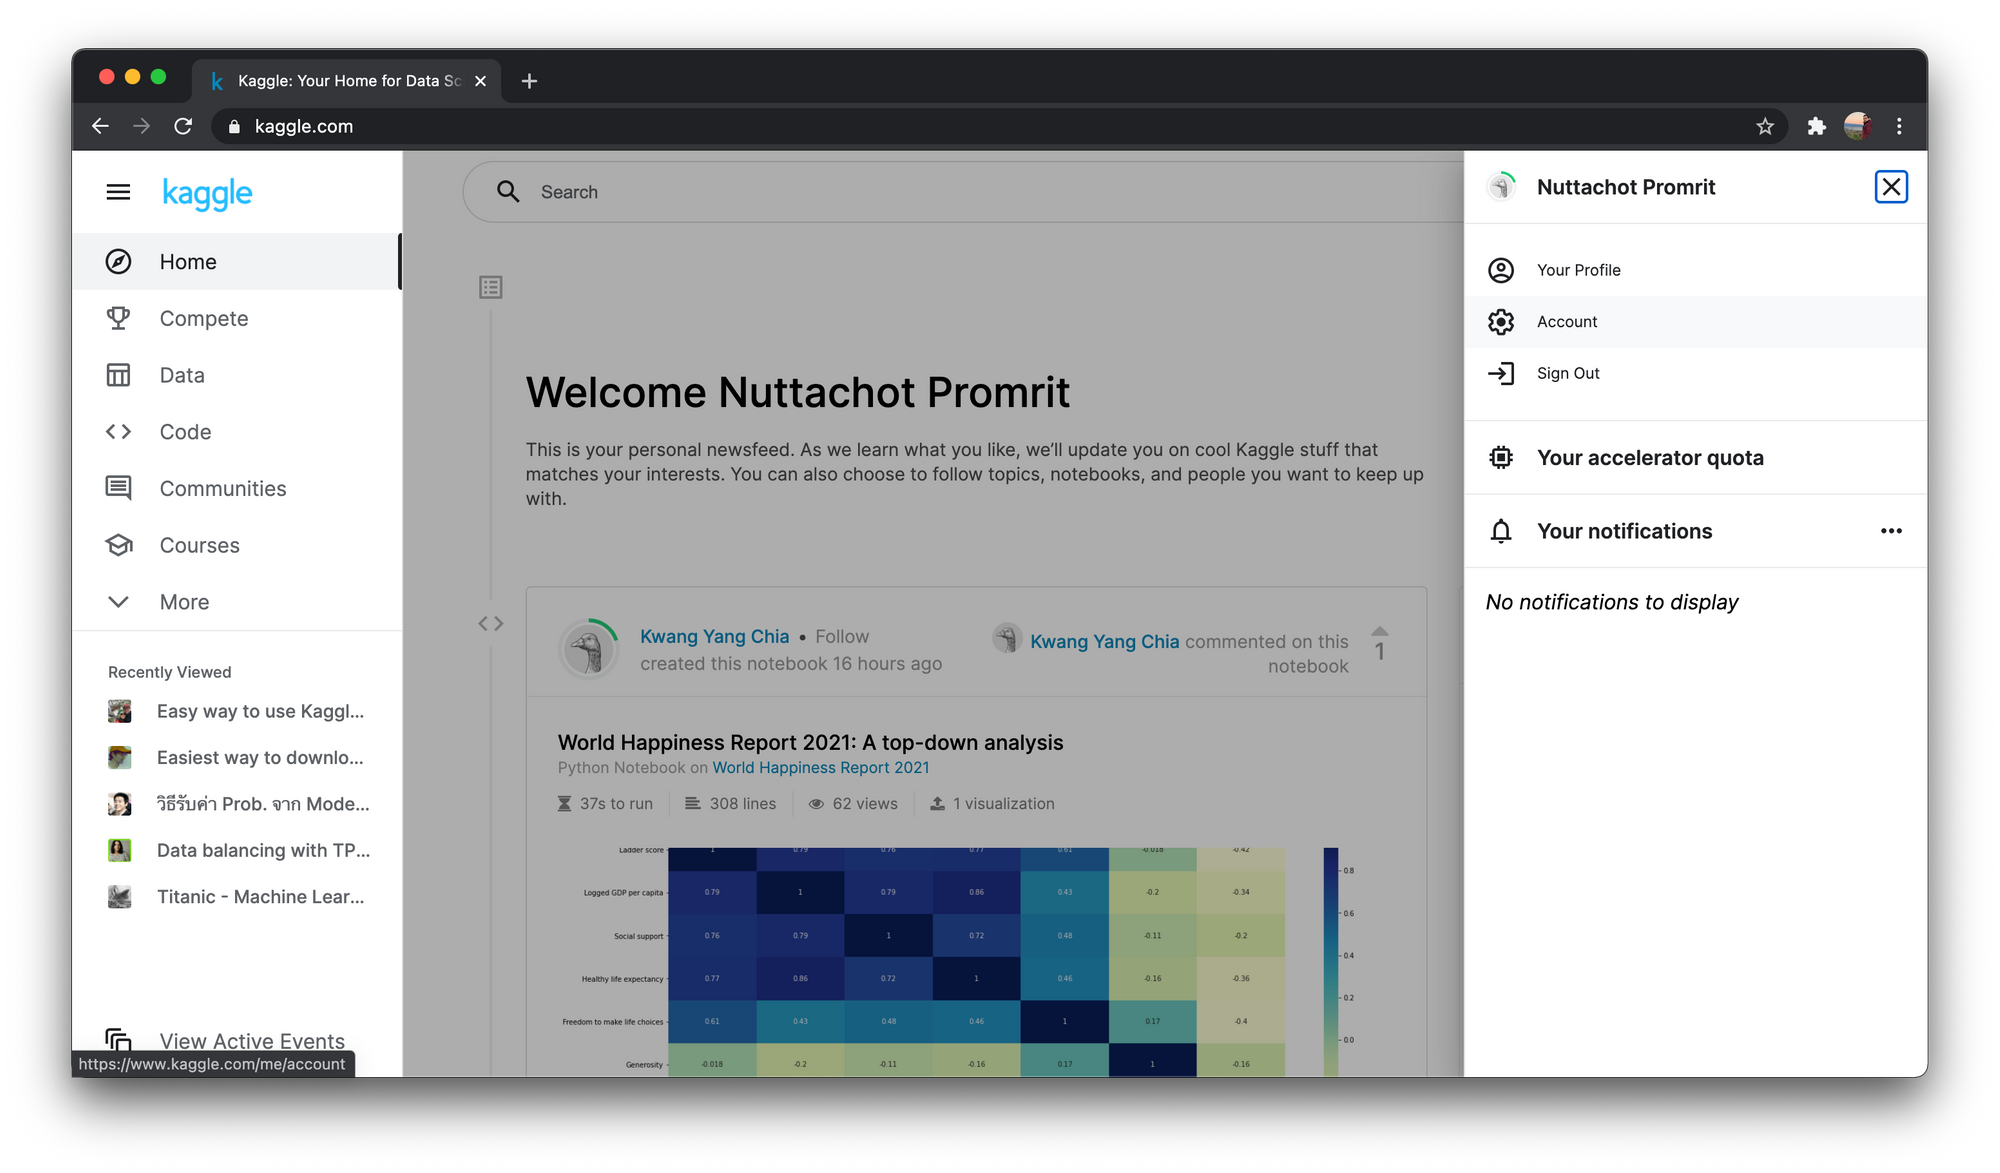

Download ไฟล์ kaggle.json โดยคลิ๊กที่ Create New API Token


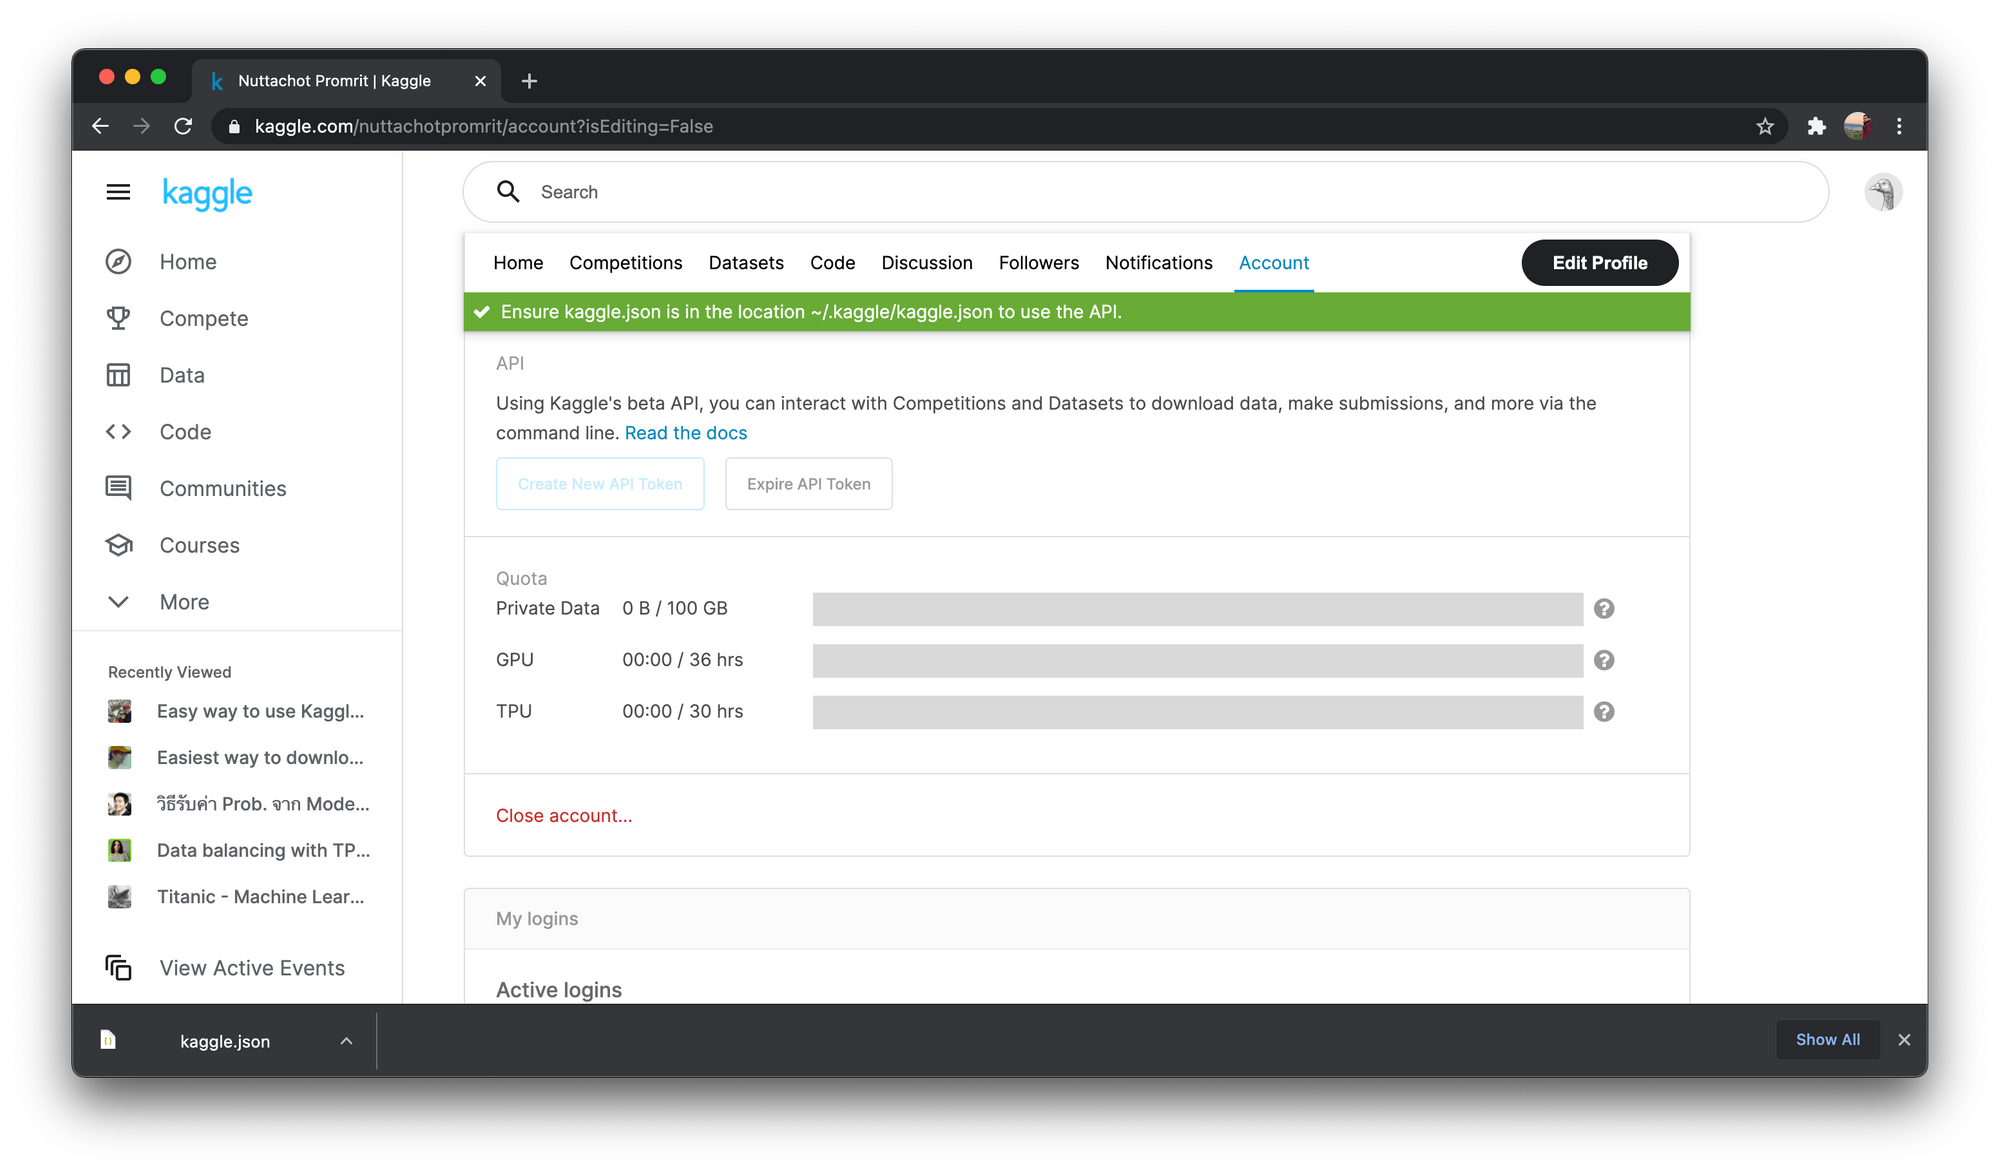

ติดตั้ง Library kaggle บน Google Colab

In [ ]:
!pip install kaggle

รัน Code ต่อไปนี้แล้ว Upload kaggle.json โดยการคลิ๊กที่ Choose Files เลือกไฟล์ kaggle.json ใน Folder Download แล้วคลิ๊กปุ่ม Open

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manassanantw","key":"e4ad56b9c0f9e0e1d75ec89d91e6fb79"}'}

สร้าง Folder kaggle เพื่อเก็บไฟล์ kaggle.json

In [ ]:
!mkdir kaggle

ย้ายไฟล์ kaggle.json ไปยัง Folder kaggle

In [ ]:
!mv kaggle.json kaggle

เปลี่ยน Permission ของไฟล์ kaggle.json

In [ ]:
!chmod 600 /content/kaggle/kaggle.json

Config kaggle Environment

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle"

ไปที่ Best Artworks of All Time Dataset คลิ๊กที่ icon 3 จุด (แนวตั้ง) แล้วเลือก Copy API command

รันคำสั่งที่ได้ Copy บน Colab Notebook เพื่อ Download Best Artworks of All Time Dataset

In [ ]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time

100% 2.29G/2.29G [00:32<00:00, 73.2MB/s]
100% 2.29G/2.29G [00:32<00:00, 76.7MB/s]


สร้าง Folder artworks แล้ว Unzip Dataset

In [ ]:
!mkdir artworks && unzip -q best-artworks-of-all-time.zip -d artworks

ซึ่งภายใน Folder artworks จะมีภาพที่วาดโดยศิลปินชื่อดังทั้งหมด 51 คน ดังต่อไปนี้

In [ ]:

# .
# ├── artists.csv
# ├── images
# │   └── images
# │       ├── Albrecht_Du?\210rer
# │       ├── Albrecht_Du?\225?êrer
# │       ├── Alfred_Sisley
# │       ├── Amedeo_Modigliani
# │       ├── Andrei_Rublev
# │       ├── Andy_Warhol
# │       ├── Camille_Pissarro
# │       ├── Caravaggio
# │       ├── Claude_Monet
# │       ├── Diego_Rivera
# │       ├── Diego_Velazquez
# │       ├── Edgar_Degas
# │       ├── Edouard_Manet
# │       ├── Edvard_Munch
# │       ├── El_Greco
# │       ├── Eugene_Delacroix
# │       ├── Francisco_Goya
# │       ├── Frida_Kahlo
# │       ├── Georges_Seurat
# │       ├── Giotto_di_Bondone
# │       ├── Gustav_Klimt
# │       ├── Gustave_Courbet
# │       ├── Henri_Matisse
# │       ├── Henri_Rousseau
# │       ├── Henri_de_Toulouse-Lautrec
# │       ├── Hieronymus_Bosch
# │       ├── Jackson_Pollock
# │       ├── Jan_van_Eyck
# │       ├── Joan_Miro
# │       ├── Kazimir_Malevich
# │       ├── Leonardo_da_Vinci
# │       ├── Marc_Chagall
# │       ├── Michelangelo
# │       ├── Mikhail_Vrubel
# │       ├── Pablo_Picasso
# │       ├── Paul_Cezanne
# │       ├── Paul_Gauguin
# │       ├── Paul_Klee
# │       ├── Peter_Paul_Rubens
# │       ├── Pierre-Auguste_Renoir
# │       ├── Piet_Mondrian
# │       ├── Pieter_Bruegel
# │       ├── Raphael
# │       ├── Rembrandt
# │       ├── Rene_Magritte
# │       ├── Salvador_Dali
# │       ├── Sandro_Botticelli
# │       ├── Titian
# │       ├── Vasiliy_Kandinskiy
# │       ├── Vincent_van_Gogh
# │       └── William_Turner
# └── resized
#     └── resized

ค้นหาภาพทั้งหมดใน Folder artworks/images/images

In [ ]:
image_path = glob.glob('artworks/images/images/*/*.jpg')

len(image_path)

8774

In [ ]:
image_path

['artworks/images/images/Jackson_Pollock/Jackson_Pollock_19.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_14.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_13.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_15.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_22.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_2.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_6.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_12.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_11.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_23.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_5.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_21.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_24.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_4.jpg',
 'artworks/images/images/Jackson_Pollock/Jackson_Pollock_1.jpg',
 'artworks/imag

Load VGG Model แบบไม่เอา Top Layer

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

รวบรวม Feature ของภาพทั้งหมด 8,774 ภาพ ที่ได้จาก VGG Model

In [ ]:
from tqdm import tqdm
image_dataset = []

for path in tqdm(image_path):
    image = load_img(path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image =  tf.keras.applications.vgg16.preprocess_input(image)
    image_dataset.append(image)

In [ ]:
feature_list = []
# feature_list_1 = []

for image in image_dataset:
    feature = vgg16_model.predict(image)
    feature = feature.flatten()
    feature_list.append(feature)
    # feature_list_1.append(feature)

IndentationError: ignored

นิยาม save_feature Function และบันทึก feature เป็น Binary File ชื่อ "feature_list.pkl"

In [ ]:
def save_feature(filename, feature):
    with open(filename, 'wb') as file:
       pic.dump(feature, file)

In [ ]:
filename = 'feature_list.pkl'

save_feature(filename, feature_list)

ดูขนาดของไฟล์ feature_list.pkl

In [ ]:
!ls feature_list.pkl -al

-rw-r--r-- 1 root root 880865867 Sep  3 09:44 feature_list.pkl


ซึ่งพบว่ามีขนาดมากกว่า 880 MB

นิยาม load_feature Function และ Load Feature ลง Memory

In [ ]:
def load_feature(filename):
    with open(filename, 'rb') as file:
        feature = pic.load(file)
        return feature

In [ ]:
filename = 'feature_list.pkl'

In [ ]:
feature_list_hdd = load_feature(filename)

In [ ]:
len(feature_list_hdd[0])

25088

Load ภาพที่ใช้ค้นหา (Query Image)

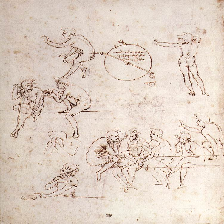

In [ ]:
# path = 'artworks/images/images/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg'
path = '/content/artworks/images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_100.jpg'

query_image = load_img(path, target_size=(224, 224))
query_image

สร้าง Feature ของ Query Image

In [ ]:
# for path in image_path:
#     image = load_img(path, target_size=(224, 224))
#     image = img_to_array(image)
#     image = np.expand_dims(image, axis=0)
#     image =  tf.keras.applications.vgg16.preprocess_input(image)
#     image_dataset.append(image)

# for image in image_dataset:
#     feature = vgg16_model.predict(image)
#     feature = feature.flatten()
#     feature_list.append(feature)

query_image = img_to_array(query_image)
query_image = np.expand_dims(query_image, axis=0)
query_image =  tf.keras.applications.vgg16.preprocess_input(query_image)

query_feature = vgg16_model.predict(query_image)
query_feature = query_feature.flatten()

1/1 [==============================] - 0s 148ms/step


In [ ]:
len(query_feature)

25088

ค้นหาภาพ 10 ภาพที่มีค่า Cosine น้อยที่สุด

In [ ]:
nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(feature_list_hdd)

In [ ]:
distances, indices = nbrs.kneighbors([query_feature])

แสดงภาพที่มีลักษณะใกล้เคียง (ยกเว้น Query Image)

ValueError: ignored

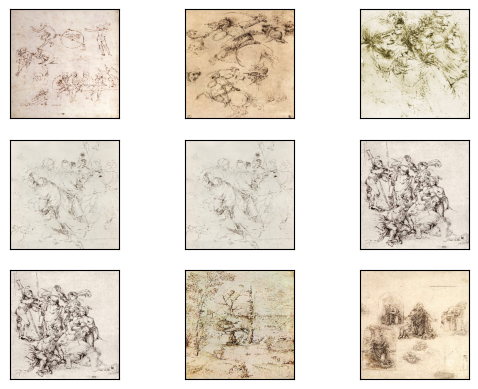

In [ ]:
sub = 0
for i in indices[0]:
    if image_path[i] != path:
        ax = plt.subplot(3, 3, 1 + sub)
        sub+=1

        ax.set_xticks([])
        ax.set_yticks([])

        result_image = load_img(image_path[i], target_size=(224, 224))
        plt.imshow(result_image)

plt.savefig('result.png', dpi = 300)

อย่างไรก็ตาม Feature ที่ได้จาก VGG Model ยังค่อนข้างมีขนาดใหญ่ ดังนั้นเราจึงมีการ ปรับปรุง Code โดยเพิ่ม Average Pooling Layer ที่ปลายของ Model ด้วยพารามิเตอร์ pooling='avg' ในขณะที่มีการ Load VGG Model แล้วรวบรวม Feature ของภาพทั้งหมด ใหม่

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
# from tqdm import tqdm
# avg_feature_list = []

# for image in tqdm( image_dataset):
#     feature = vgg16_model.predict(image)
#     feature = feature.flatten()
#     avg_feature_list.append(feature)

In [ ]:
from tqdm import tqdm
avg_feature_list = []

for path in tqdm(image_path):
  image = load_img(path, target_size=(224, 224))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  image =  tf.keras.applications.vgg16.preprocess_input(image)
  feature = vgg16_model.predict(image,verbose=0)
  feature = feature.flatten()
  avg_feature_list.append(feature)


  2%|▏         | 197/8774 [00:23<16:47,  8.51it/s]


KeyboardInterrupt: ignored

In [ ]:
filename = 'avg_feature_list.pkl'

save_feature(filename, avg_feature_list)

ดูขนาดของไฟล์ avg_feature_list.pkl

In [ ]:
!ls avg_feature_list.pkl -al

ซึ่งพบว่ามีขนาดลดลงเหลือเพียงประมาณ 18 MB เมื่อมีการเพิ่ม Average Pooling Layer

Load Feature ลง Memory

In [ ]:
avg_feature_list_hdd = load_feature(filename)

In [ ]:
avg_feature_list_hdd

สร้าง Feature ของ Query Image ใหม่

In [ ]:
query_feature = vgg16_model.predict(query_image)
query_feature = query_feature.flatten()

แล้วค้นหาภาพ 10 ภาพที่มีค่า Cosine น้อยที่สุด

In [ ]:
nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(avg_feature_list_hdd)

In [ ]:
distances, indices = nbrs.kneighbors([query_feature])

In [ ]:
sub = 0
for i in indices[0]:
    if image_path[i] != path:
        ax = plt.subplot(3, 3, 1 + sub)
        sub+=1

        ax.set_xticks([])
        ax.set_yticks([])

        result_image = load_img(image_path[i], target_size=(224, 224))
        plt.imshow(result_image)

plt.savefig('result.png', dpi = 300)

###Fine-tuning (Classifier)

เราจะ Fine-tuning VGG Model เพื่อ Classify ภาพใน Best Artworks of All Time Dataset ว่าเป็นของศิลปินคนไหนจากทั้งหมด 11 คน โดยการตัดส่วนปลายของ Model แล้วเพิ่ม Layer ใหม่ และทดลองแช่แข็งบาง Layer รวมทั้ง Train ใหม่ทุก Layer ตาม Strategy S3, S4, S5 และ S6 ดังต่อไปนี้

S3

Import Library ที่ต้องใช้งาน

In [ ]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
load_model = tf.keras.models.load_model

import pandas as pd

Load VGG Model ทั้งหมดรวม Top Layer และกำหนด input_shape = (224, 224, 3)

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))


แช่แข็งทุก Layer ที่ได้ Load มา

In [ ]:
vgg16_model.trainable = False

แสดงข้อมูลสรุปของ VGG Model

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

จะเห็นว่า VGG Model มีจำนวน Layer ในส่วน Classifier Layer ทั้งหมด 4 Layer ได้แก่ flatten, fc1, fc2 และ predictions รวมพารามิเตอร์ ที่ถูกแช่แข็ง 138,357,544 ตัว

ตัดส่วนปลายออก 1 Layer

In [ ]:
vgg16_model = tf.keras.models.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)

vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

เพิ่ม Dense Layer สำหรับการทำนายศิลปิน 11 Class

In [ ]:
output = tf.keras.layers.Dense(11, activation='softmax')(vgg16_model.layers[-1].output)

model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)

Compile Model โดยกำหนด Learning Rate เท่ากับ 0.0001 (ค่า Default 0.001)

In [ ]:
adam_optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

อ่านไฟล์ artists.csv เพื่อกรองเอาเฉพาะภาพวาดของศิลปินที่มีจำนวนตั้งแต่ 200 ภาพขึ้นไป และคำนวนค่าน้ำหนักของคลาส (Class Weight) สำหรับแก้ปัญหา Imbalanced Dataset โดยการปรับเปลี่ยน Loss Function เพื่อให้โทษกับ Class ด้วยน้ำหนักที่ต่างกัน ซึ่งจะมีการเพิ่มอำนาจ Class ที่มีจำนวนข้อมูลน้อย และลดอำนาจ Class ที่มีจำนวนข้อมูลมาก

In [ ]:
artists_df = pd.read_csv('artworks/artists.csv')

artists_df.head()

id                name        years                         genre  \
0   0   Amedeo Modigliani  1884 - 1920                 Expressionism   
1   1  Vasiliy Kandinskiy  1866 - 1944  Expressionism,Abstractionism   
2   2        Diego Rivera  1886 - 1957       Social Realism,Muralism   
3   3        Claude Monet  1840 - 1926                 Impressionism   
4   4       Rene Magritte  1898 - 1967      Surrealism,Impressionism   

  nationality                                                bio  \
0     Italian  Amedeo Clemente Modigliani (Italian pronunciat...   
1     Russian  Wassily Wassilyevich Kandinsky (Russian: Васи́...   
2     Mexican  Diego María de la Concepción Juan Nepomuceno E...   
3      French  Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...   
4     Belgian  René François Ghislain Magritte (French: [ʁəne...   

                                        wikipedia  paintings  
0  http://en.wikipedia.org/wiki/Amedeo_Modigliani        193  
1  http://en.wikipedia.org/wiki/Wassily_Kandinsky         88  
2       http://en.wikipedia.org/wiki/Diego_Rivera         70  
3       http://en.wikipedia.org/wiki/Claude_Monet         73  
4      http://en.wikipedia.org/wiki/René_Magritte        194

เรียงลำดับข้อมูลจากมากไปน้อย จากจำนวนภาพวาดของศิลปิน

In [ ]:
artists_df.sort_values(by=['paintings'], ascending=False, inplace=True)

artists_df.head(15)

id                   name        years  \
8    8       Vincent van Gogh  1853 – 1890   
30  30            Edgar Degas  1834 - 1917   
13  13          Pablo Picasso  1881 - 1973   
15  15  Pierre-Auguste Renoir  1841 - 1919   
19  19         Albrecht Dürer  1471 - 1528   
46  46           Paul Gauguin  1848 – 1903   
16  16         Francisco Goya  1746 - 1828   
31  31              Rembrandt  1606 - 1669   
20  20          Alfred Sisley  1839 - 1899   
32  32                 Titian  1488 - 1576   
22  22           Marc Chagall  1887 - 1985   
4    4          Rene Magritte  1898 - 1967   
0    0      Amedeo Modigliani  1884 - 1920   
42  42              Paul Klee  1879 – 1940   
28  28          Henri Matisse  1869 - 1954   

                                      genre               nationality  \
8                        Post-Impressionism                     Dutch   
30                            Impressionism                    French   
13                                   Cubism                   Spanish   
15                            Impressionism                    French   
19                     Northern Renaissance                    German   
46             Symbolism,Post-Impressionism                    French   
16                              Romanticism                   Spanish   
31                                  Baroque                     Dutch   
20                            Impressionism            French,British   
32               High Renaissance,Mannerism                   Italian   
22                              Primitivism  French,Jewish,Belarusian   
4                  Surrealism,Impressionism                   Belgian   
0                             Expressionism                   Italian   
42  Expressionism,Abstractionism,Surrealism              German,Swiss   
28         Impressionism,Post-Impressionism                    French   

                                                  bio  \
8   Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...   
30  Edgar Degas (US:  or UK: ; born Hilaire-Germai...   
13  Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...   
15  Pierre-Auguste Renoir, commonly known as Augus...   
19  Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...   
46  Eugène Henri Paul Gauguin (UK: , US: ; French:...   
16  Francisco José de Goya y Lucientes (; Spanish:...   
31  Rembrandt Harmenszoon van Rijn (; Dutch: [ˈrɛm...   
20  Alfred Sisley (; French: [sislɛ]; 30 October 1...   
32  Tiziano Vecelli or Tiziano Vecellio (pronounce...   
22  Marc Zakharovich Chagall ( shə-GAHL; born Mois...   
4   René François Ghislain Magritte (French: [ʁəne...   
0   Amedeo Clemente Modigliani (Italian pronunciat...   
42  Paul Klee (German: [paʊ̯l ˈkleː]; 18 December ...   
28  Henri Émile Benoît Matisse (French: [ɑ̃ʁi emil...   

                                            wikipedia  paintings  
8       http://en.wikipedia.org/wiki/Vincent_van_Gogh        877  
30           http://en.wikipedia.org/wiki/Edgar_Degas        702  
13         http://en.wikipedia.org/wiki/Pablo_Picasso        439  
15  http://en.wikipedia.org/wiki/Pierre-Auguste_Re...        336  
19        http://en.wikipedia.org/wiki/Albrecht_Dürer        328  
46          http://en.wikipedia.org/wiki/Paul_Gauguin        311  
16        http://en.wikipedia.org/wiki/Francisco_Goya        291  
31             http://en.wikipedia.org/wiki/Rembrandt        262  
20         http://en.wikipedia.org/wiki/Alfred_Sisley        259  
32                http://en.wikipedia.org/wiki/Titian        255  
22          http://en.wikipedia.org/wiki/Marc_Chagall        239  
4          http://en.wikipedia.org/wiki/René_Magritte        194  
0      http://en.wikipedia.org/wiki/Amedeo_Modigliani        193  
42            https://en.wikipedia.org/wiki/Paul_Klee        188  
28         http://en.wikipedia.org/wiki/Henri_Matisse        186

กรองเอาเฉพาะภาพของศิลปินตั้งแต่ 200 ภาพขึ้นไป

In [ ]:
artists_top = artists_df[artists_df['paintings'] >= 200].reset_index()

artists_top.shape

(11, 9)

เลือกเฉพาะ Column name และ paintings

In [ ]:
artists_top = artists_top[['name', 'paintings']]

artists_top.head()

name  paintings
0       Vincent van Gogh        877
1            Edgar Degas        702
2          Pablo Picasso        439
3  Pierre-Auguste Renoir        336
4         Albrecht Dürer        328

คำนวนค่า Class Weight โดยจะให้น้ำหนัก Class ที่มีจำนวนภาพน้อย มากกว่า Class ที่มีจำนวนภาพมากกว่า (Class ที่มีจำนวนภาพใกล้ค่าเฉลี่ย 4,299/11 = 390.82 ภาพ จะได้น้ำหนักใกล้ๆ 1.0)

In [ ]:
artists_top['class_weight'] = artists_top.paintings.sum()/(artists_top.shape[0] * artists_top.paintings)

artists_top

name  paintings  class_weight
0        Vincent van Gogh        877      0.445631
1             Edgar Degas        702      0.556721
2           Pablo Picasso        439      0.890246
3   Pierre-Auguste Renoir        336      1.163149
4          Albrecht Dürer        328      1.191519
5            Paul Gauguin        311      1.256650
6          Francisco Goya        291      1.343018
7               Rembrandt        262      1.491672
8           Alfred Sisley        259      1.508951
9                  Titian        255      1.532620
10           Marc Chagall        239      1.635223

แปลง Class Weight เป็น Dict สำหรับนำเข้า Function model.fit()

In [ ]:
class_weights = artists_top['class_weight'].to_dict()

class_weights

{0: 0.44563076604125634,
 1: 0.5567210567210568,
 2: 0.8902464278318493,
 3: 1.1631493506493507,
 4: 1.1915188470066518,
 5: 1.2566501023092662,
 6: 1.3430178069353327,
 7: 1.491672449687717,
 8: 1.5089505089505089,
 9: 1.532620320855615,
 10: 1.6352225180677062}

แสดงชื่อศิลปินที่มีภาพผลงานตั้งแต่ 200 ภาพขึ้นไป

In [ ]:
artists_top['name']

0          Vincent van Gogh
1               Edgar Degas
2             Pablo Picasso
3     Pierre-Auguste Renoir
4            Albrecht Dürer
5              Paul Gauguin
6            Francisco Goya
7                 Rembrandt
8             Alfred Sisley
9                    Titian
10             Marc Chagall
Name: name, dtype: object

แทนที่ช่องว่างด้วย _

In [ ]:
artists_top_name = artists_top['name'].str.replace(' ', '_')

artists_top_name

0          Vincent_van_Gogh
1               Edgar_Degas
2             Pablo_Picasso
3     Pierre-Auguste_Renoir
4            Albrecht_Dürer
5              Paul_Gauguin
6            Francisco_Goya
7                 Rembrandt
8             Alfred_Sisley
9                    Titian
10             Marc_Chagall
Name: name, dtype: object

แล้วแปลงเป็น List

In [ ]:
artists_class = artists_top_name.tolist()

artists_class

['Vincent_van_Gogh',
 'Edgar_Degas',
 'Pablo_Picasso',
 'Pierre-Auguste_Renoir',
 'Albrecht_Dürer',
 'Paul_Gauguin',
 'Francisco_Goya',
 'Rembrandt',
 'Alfred_Sisley',
 'Titian',
 'Marc_Chagall']

สร้าง ImageDataGenerator 2 ตัว สำหรับ Train Dataset และ Validation Dataset โดยอ่านไฟล์ภาพ แล้วแบ่ง Dataset ในการ Train 80% และ Validate 20% ทำ Image Preprocessing รวมทั้ง Image Augmentation ด้วยการสุ่มพลิกภาพซ้าย-ขวา เฉพาะ Train Dataset ซึ่งจะต้องไม่มีการสุ่มเลือกภาพ (Default Shuffle = True) ขณะอ่านไฟล์ เพื่อที่ Dataset ทั้งสอง จะไม่มีโอกาสได้ภาพซ้ำกัน

In [ ]:
datagen = ImageDataGenerator(validation_split=0.2,
                             preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                             horizontal_flip=True)

valid_datagen=ImageDataGenerator(validation_split=0.2,
                                 preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

Load ภาพสำหรับการ Train เฉพาะศิลปินที่มีภาพผลงานตั้งแต่ 200 ภาพขึ้นไป ด้วย Parameter classes=artists_class

In [ ]:
train_artworks = datagen.flow_from_directory('artworks/images/images',
                                      subset='training',
                                      class_mode='categorical',
                                      target_size=(224, 224),
                                      color_mode='rgb',
                                      batch_size=64,
                                      shuffle=False,
                                      seed=99,
                                      classes=artists_class)

Found 3181 images belonging to 11 classes.


สรุปข้อมูลของแต่ละ Batch

In [ ]:
batch_x, batch_y = train_artworks.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batch_x.shape, batch_x.min(), batch_x.max()))

Batch shape=(64, 224, 224, 3), min=-123.680, max=151.061


Load ภาพสำหรับการ Validate เฉพาะศิลปินที่มีภาพผลงานตั้งแต่ 200 ภาพขึ้นไป ด้วย Parameter classes=artists_class

In [ ]:
validate_artworks = valid_datagen.flow_from_directory('artworks/images/images',
                                      subset='validation',
                                      class_mode='categorical',
                                      target_size=(224, 224),
                                      color_mode='rgb',
                                      batch_size=64,
                                      shuffle=False,
                                      seed=99,
                                      classes=artists_class)

Found 790 images belonging to 11 classes.


สรุปข้อมูลของแต่ละ Batch

In [ ]:
batch_x, batch_y = validate_artworks.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batch_x.shape, batch_x.min(), batch_x.max()))

Batch shape=(64, 224, 224, 3), min=-123.680, max=151.061


ดู Shape ผลเฉลยของแต่ละ Batch

In [ ]:
batch_y.shape

(64, 11)

คำนวณ Steps Per Epoch

In [ ]:
SPE_TRAIN = train_artworks.n//train_artworks.batch_size
SPE_VALID = validate_artworks.n//validate_artworks.batch_size
SPE_TRAIN, SPE_VALID


(49, 12)

ปรับลดค่า Learning Rate ด้วยการคูณกับค่า factor เมื่อเจอที่ราบสูง (Plateau) และทำ Checkpoint เพื่อ Save Model เฉพาะ Epoch ที่ให้ค่า val_loss ตำ่ที่สุด

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

filepath="weights_best_s3.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

Train Model และแก้ปัญหา Imbalanced Dataset ด้วย Class Weight

In [ ]:
history = model.fit(train_artworks,
                    validation_data=validate_artworks,
                    epochs=20,
                    steps_per_epoch= SPE_TRAIN,
                    validation_steps=SPE_VALID,
                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Epoch 1/20
49/49 [==============================] - ETA: 0s - loss: 3.6163 - accuracy: 0.0959
Epoch 1: val_loss improved from inf to 2.63275, saving model to weights_best_s3.h5
49/49 [==============================] - 58s 977ms/step - loss: 3.6163 - accuracy: 0.0959 - val_loss: 2.6328 - val_accuracy: 0.1497 - lr: 1.0000e-04
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 2.5117 - accuracy: 0.1572
Epoch 2: val_loss improved from 2.63275 to 2.20907, saving model to weights_best_s3.h5
49/49 [==============================] - 43s 873ms/step - loss: 2.5117 - accuracy: 0.1572 - val_loss: 2.2091 - val_accuracy: 0.2487 - lr: 1.0000e-04
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 2.1051 - accuracy: 0.2602
Epoch 3: val_loss improved from 2.20907 to 2.13542, saving model to weights_best_s3.h5
49/49 [==============================] - 46s 947ms/step - loss: 2.1051 - accuracy: 0.2602 - val_loss: 2.1354 - val_accuracy: 0.2760 - lr: 1.0000e-04
Epoch 4/20
49/

Plot กราฟ Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot กราฟ Accuracy

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Evaluate Model

In [ ]:
model = load_model(filepath)
score = model.evaluate(validate_artworks, verbose=1)

S4

Load VGG Model ทั้งหมดรวม Top Layer และกำหนด input_shape = (224, 224, 3)

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

แช่แข็งทุก Layer ที่ได้ Load มา

In [ ]:
vgg16_model.trainable = False

ตัดส่วนปลายออก 1 Layer

In [ ]:
vgg16_model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)

กำหนดให้ 2 Layer สุดท้ายสามารถ Train ใหม่ได้

In [ ]:
vgg16_model.get_layer('fc2').trainable = True
vgg16_model.get_layer('fc1').trainable = True

เพิ่ม Dense Layer สำหรับ Classify ภาพศิลปิน 11 คน

In [ ]:
output = tf.keras.layers.Dense(11, activation='softmax')(vgg16_model.layers[-1].output)

model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)

Compile Model โดยลด Learning Rate เหลือ 0.00001 จากเดิม 0.0001 ใน S3 Model

In [ ]:
adam_optimizer = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

model.summary()

ทำ Checkpoint เพื่อ Save Model เฉพาะ Epoch ที่ให้ค่า val_loss ตำ่ที่สุด

In [ ]:
filepath="weights_best_s4.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

Train Model และแก้ปัญหา Imbalanced Dataset ด้วย Class Weight

In [ ]:
history2 = model.fit(train_artworks,
                    validation_data=validate_artworks,
                    epochs=20,
                    steps_per_epoch= SPE_TRAIN,
                    validation_steps=SPE_VALID,
                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Plot กราฟ Loss

In [ ]:
h1 = go.Scatter(y=history2.history['loss'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history2.history['val_loss'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot กราฟ Accuracy

In [ ]:
h1 = go.Scatter(y=history2.history['accuracy'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history2.history['val_accuracy'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Evaluate Model

model = load_model(filepath)
score = model.evaluate(validate_artworks, verbose=1)

S5

Load VGG Model ทั้งหมดรวม Top Layer และกำหนด input_shape = (224, 224, 3)

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

แช่แข็งทุก Layer ที่ได้ Load มา

In [ ]:
vgg16_model.trainable = False

ตัดส่วนปลายออก 1 Layer

In [ ]:
vgg16_model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)

เพิ่ม Dense Layer สำหรับ Classify ภาพที่วาดโดยศิลปิน 11 คน

In [ ]:
output = tf.keras.layers.Dense(11, activation='softmax')(vgg16_model.layers[-1].output)

model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)

กำหนดให้ตั้งแต่ Layer ที่ 10 (Layer 0 คือ Input Layer) จนถึง Layer สุดท้าย (Output Layer) สามารถ Train ใหม่ได้

In [ ]:
for layer in model.layers[10:]:
    layer.trainable = True

Compile Model

In [ ]:
adam_optimizer = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

model.summary()

ทำ Checkpoint เพื่อ Save Model เฉพาะ Epoch ที่ให้ค่า val_loss ตำ่ที่สุด

In [ ]:
filepath="weights_best_s5.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

Train Model และแก้ปัญหา Imbalanced Dataset ด้วย Class Weight

In [ ]:
history3 = model.fit(train_artworks,
                    validation_data=validate_artworks,
                    epochs=20,
                    steps_per_epoch= SPE_TRAIN,
                    validation_steps=SPE_VALID,
                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Plot กราฟ Loss

In [ ]:
h1 = go.Scatter(y=history3.history['loss'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history3.history['val_loss'],
                    mode="lines",
                      line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot กราฟ Accuracy

In [ ]:
h1 = go.Scatter(y=history3.history['accuracy'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history3.history['val_accuracy'],
                    mode="lines",
                    line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Evaluate Model

In [ ]:
model = load_model(filepath)
score = model.evaluate(validate_artworks, verbose=1)

S6

Load VGG Model ทั้งหมดรวม Top Layer และกำหนด input_shape = (224, 224, 3)

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

กำหนดให้สามารถ Train ใหม่ได้ทุก Layer

In [ ]:
vgg16_model.trainable = True

ตัดส่วนปลายออก 1 Layer

In [ ]:
vgg16_model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)

เพิ่ม Dense Layer สำหรับ Classify ภาพศิลปิน 11 คน

In [ ]:
output = tf.keras.layers.Dense(11, activation='softmax')(vgg16_model.layers[-1].output)

model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)

Compile Model

In [ ]:
adam_optimizer = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

model.summary()


ทำ Checkpoint เพื่อ Save Model เฉพาะ Epoch ที่ให้ค่า val_loss ตำ่ที่สุด

In [ ]:
filepath="weights_best_s6.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

Train Model และแก้ปัญหา Imbalanced Dataset ด้วย Class Weight

In [ ]:
history4 = model.fit(train_artworks,
                    validation_data=validate_artworks,
                    epochs=20,
                    steps_per_epoch= SPE_TRAIN,
                    validation_steps=SPE_VALID,
                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Plot กราฟ Loss

In [ ]:
h1 = go.Scatter(y=history4.history['loss'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history4.history['val_loss'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot กราฟ Accuracy

In [ ]:
h1 = go.Scatter(y=history4.history['accuracy'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history4.history['val_accuracy'],
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Evaluate Model

In [ ]:
model = load_model(filepath)
score = model.evaluate(validate_artworks, verbose=1)

โดยแต่ละ Strategy ตั้งแต่ S3-S6 มี Validation Loss และ Validation Accuracy ดังกราฟต่อไปนี้



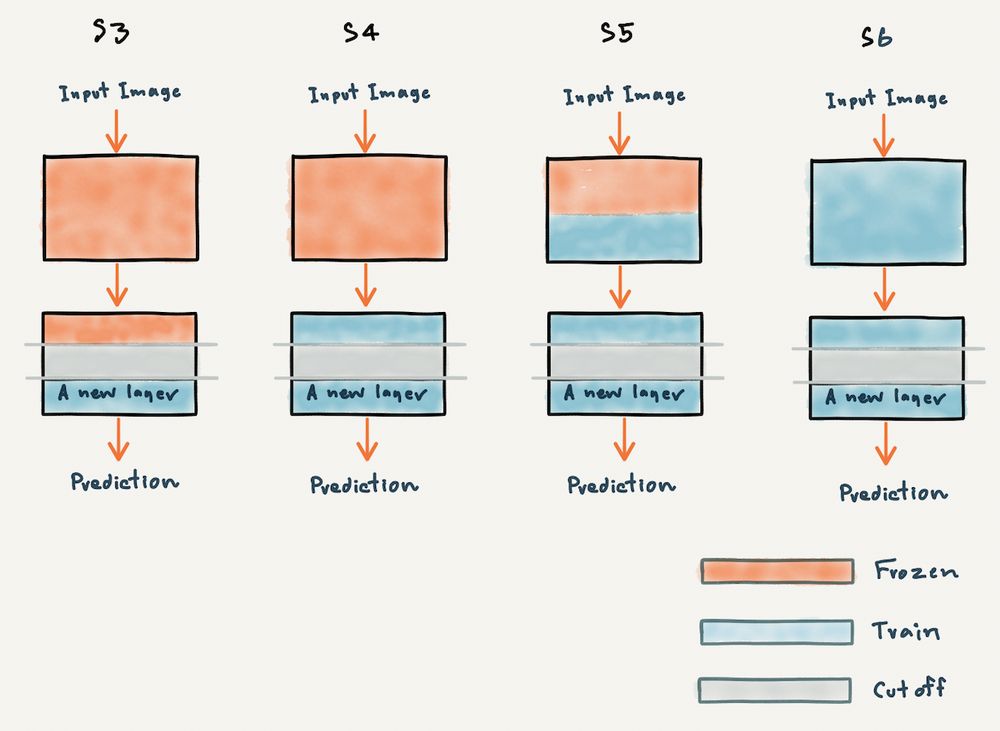